In [3]:
import gensim
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
from nltk.probability import FreqDist

from gensim import corpora
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
from smart_open import smart_open
import os


from nltk.corpus import stopwords
# from gensim.utils import simple_preprocess, lemmatize
# from gensim.models import LdaModel, LdaMulticore
# import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [28]:
ls data/

greta_thunberg_for_25_years_countless.txt
greta_thunberg_i_have_some_good_news.txt
greta_thunberg_my_name_is_greta_thunberg.txt
greta_thunberg_our_house_is_on_fire.txt
greta_thunberg_some_people_say_that_we_are_not_doing_enough.txt
greta_thunberg_when_i_was_about_8_years_old.txt


In [29]:
entries = os.listdir('data/')

In [30]:
entries

['greta_thunberg_for_25_years_countless.txt',
 'greta_thunberg_my_name_is_greta_thunberg.txt',
 'greta_thunberg_i_have_some_good_news.txt',
 'greta_thunberg_when_i_was_about_8_years_old.txt',
 'greta_thunberg_some_people_say_that_we_are_not_doing_enough.txt',
 'greta_thunberg_our_house_is_on_fire.txt']

In [34]:
content = {}
for file in entries:
    with open('data/' + file, 'r') as f:
        content[file] = f.read()

In [37]:
all_speeches_content = ""
for text in content.values():
    all_speeches_content += text

In [38]:
all_speeches_content

'For 25 years countless of people have stood in front of the United Nations climate conferences, asking our nations leaders to stop the emissions. But, clearly this has not worked since the emissions just continue to rise.\n\nSo I will not ask them anything.\n\nInstead I will ask the media to start treating the crisis as a crisis.\n\nInstead I will ask the people around the world to realize that our political leaders have failed us.\n\nBecause we are facing an existential threat and there is no time to continue down this road of madness.\n\nRich countries like Sweden need to start reducing emissions by at least 15% every year to reach the 2 degree warming target. You would think the media and everyone of our leaders would be talking about nothing else – but no one ever even mentions it.\n\nNor does hardly anyone ever talk about that we are in the midst of the sixth mass extinction, with up to 200 species going extinct every single day.\n\nFurthermore does no one ever speak about the as

In [39]:
# Tokenize sentences into words
words = word_tokenize(all_speeches_content)

In [50]:
# TODO: check why stopwords are still there

In [40]:
def preprocess_words(words, stop_words):
    cleaned_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            cleaned_words.append(word.lower())
    return cleaned_words

In [41]:
cleaned_words = preprocess_words(words=words, stop_words=stop_words)

In [42]:
FreqDist(cleaned_words).keys()

dict_keys(['for', 'years', 'countless', 'people', 'stood', 'front', 'united', 'nations', 'climate', 'conferences', 'asking', 'leaders', 'stop', 'emissions', 'but', 'clearly', 'worked', 'since', 'continue', 'rise', 'so', 'i', 'ask', 'anything', 'instead', 'media', 'start', 'treating', 'crisis', 'around', 'world', 'realize', 'political', 'failed', 'us', 'because', 'facing', 'existential', 'threat', 'time', 'road', 'madness', 'rich', 'countries', 'like', 'sweden', 'need', 'reducing', 'least', 'every', 'year', 'reach', 'degree', 'warming', 'target', 'you', 'would', 'think', 'everyone', 'talking', 'nothing', 'else', 'one', 'ever', 'even', 'mentions', 'nor', 'hardly', 'anyone', 'talk', 'midst', 'sixth', 'mass', 'extinction', 'species', 'going', 'extinct', 'single', 'day', 'furthermore', 'speak', 'aspect', 'equity', 'stated', 'everywhere', 'parisagreement', 'absolutely', 'necessary', 'make', 'work', 'global', 'scale', 'that', 'means', 'mine', 'get', 'zero', 'within', 'todays', 'emission', 'sp

In [43]:
word_counts = pd.Series(FreqDist(cleaned_words)).sort_values(ascending=False)

In [ ]:
# TODO: Remove stopwords

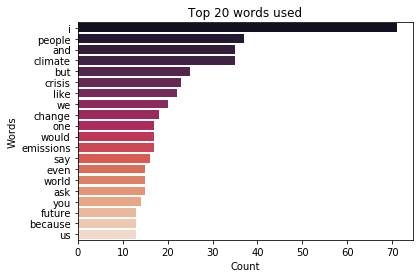

In [44]:
fig, ax = plt.subplots()
sns.barplot(y=word_counts[:20].index, x=word_counts[:20].values, palette="rocket")
ax.set_title("Top 20 words used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");

In [45]:
word_tags = nltk.pos_tag(cleaned_words)

In [46]:
word_tags[:10]

[('for', 'IN'),
 ('years', 'NNS'),
 ('countless', 'JJ'),
 ('people', 'NNS'),
 ('stood', 'VBD'),
 ('front', 'JJ'),
 ('united', 'JJ'),
 ('nations', 'NNS'),
 ('climate', 'NN'),
 ('conferences', 'NNS')]

In [47]:
nouns = [word[0] for word in word_tags if word[1] == 'NN']

In [48]:
noun_counts = pd.Series(FreqDist(nouns)).sort_values(ascending=False)

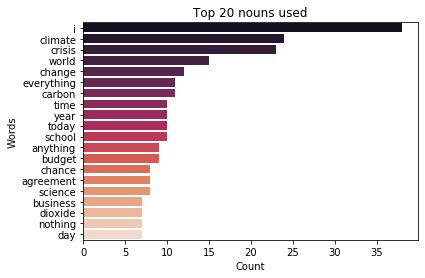

In [49]:
fig, ax = plt.subplots()
sns.barplot(y=noun_counts[:20].index, x=noun_counts[:20].values, palette="rocket")
ax.set_title("Top 20 nouns used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");